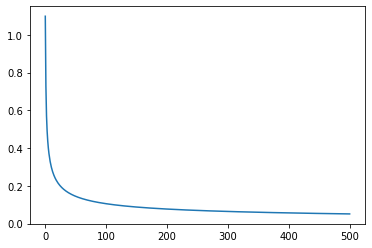

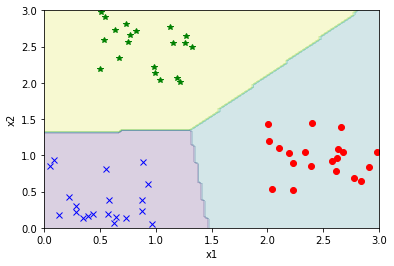

In [2]:
# import auto diff
from autograd import grad
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd.misc.flatten import flatten_func
from autograd import value_and_grad 

# compute C linear combinations, one per classifier
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

# multiclass perceptron
lam = 10**-21 # reg param
def softmax_multiclass(x,y,w):
    # pre-compute predictions on all points
    all_evals = model(x,w)
    a = np.log(np.sum(np.exp(all_evals),axis = 0))
    # compute cost in compact form using numpy broadcasting
    b = all_evals[y.astype(int),np.arange(np.size(y))]
    cost = np.sum(a-b)
    # add reg
    cost = cost + lam*np.linalg.norm(w[1:,:],'fro')**2
    # return average
    return cost/float(np.size(y))
# gradient descent function
def gradient_descent(g, step, max_its, w):
    # flatten g
    g_flat, unflatten_func, w_flat = flatten_func(g,w)
    # compute gradient
    gradient = grad(g_flat)
    # gradient descent loop
    weight_history = [w_flat] # weight history container
    cost_history = [g_flat(w_flat)] # cost history container
    for k in range(max_its):
        # eval gradient
        grad_eval = gradient(w_flat)
        grad_eval_norm = grad_eval / np.linalg.norm(grad_eval)
        # take grad descent step
        if step == 'd':
            alpha = 1/(k+1)
        else:
            alpha = step
        w_flat = w_flat - alpha*grad_eval_norm
        # record weight and cost
        weight_history.append(w_flat)
        cost_history.append(g_flat(w_flat))
    return weight_history, cost_history, unflatten_func



Pc = 20 # points per class
C = 3 # n. classes
iter = 500
N = 2

x1 = np.random.rand(2,Pc)+[[0],[0]]
x2 = np.random.rand(2,Pc)+[[2],[0.5]]
x3 = np.random.rand(2,Pc)+[[0.5],[2]]
x = np.c_[x1,x2,x3]
#print(x.shape)
y = np.c_[0*np.ones((1,Pc)), np.ones((1,Pc)), 2*np.ones((1,Pc))]

plt.figure(1)
plt.plot(x1[0,0:].T,x1[1,0:].T,'xb')
plt.plot(x2[0,0:].T,x2[1,0:].T,'or')
plt.plot(x3[0,0:].T,x3[1,0:].T,'*g')

w = np.ones((N+1,C))
def c(t):
    c = softmax_multiclass(x,y,t)
    return c


a, b, unflatten = gradient_descent(c,'d',iter,w)
plt.figure(0)
plt.plot(b)

wp = unflatten(a[iter])
xp1, xp2 = np.meshgrid(np.linspace(0,3,100),np.linspace(0,3,100))
# vectorize mesh grid
xp1_v = xp1.reshape(-1,1)
xp2_v = xp2.reshape(-1,1)
Xp_data = np.append(xp1_v,xp2_v,axis=1)

v=model(Xp_data.T,wp)
z=np.argmax(v,axis=0)
z=z.reshape(xp1.shape)
plt.figure(1)
plt.contourf(xp1,xp2,z,alpha=.2)
plt.xlabel('x1')
plt.ylabel('x2');


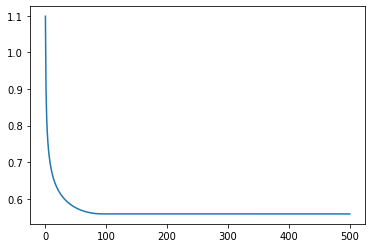

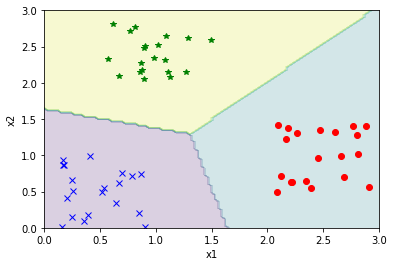

In [3]:
#import auto diff
from autograd import grad
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd.misc.flatten import flatten_func
from autograd import value_and_grad 

# compute C linear combinations, one per classifier
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

# multiclass perceptron
lam = 10**-21 # reg param
def CategCross_multiclass(x,y,w):
    # pre-compute predictions on all points
    all_evals = model(x,w/np.linalg.norm(w[1:]))
    a = np.sum(np.exp(all_evals),axis = 0)
    b = np.exp(all_evals[y.astype(int),np.arange(np.size(y))])
    # compute cost in compact form using numpy broadcasting
    cost = -np.sum(np.log(b/a))
    # add reg
    cost = cost + lam*np.linalg.norm(w[1:,:],'fro')**2
    # return average
    return cost/float(np.size(y))
# gradient descent function
def gradient_descent(g, step, max_its, w):
    # flatten g
    g_flat, unflatten_func, w_flat = flatten_func(g,w)
    # compute gradient
    gradient = grad(g_flat)
    # gradient descent loop
    weight_history = [w_flat] # weight history container
    cost_history = [g_flat(w_flat)] # cost history container
    for k in range(max_its):
        # eval gradient
        grad_eval = gradient(w_flat)
        grad_eval_norm = grad_eval / np.linalg.norm(grad_eval)
        # take grad descent step
        if step == 'd':
            alpha = 1/(k+1)
        else:
            alpha = step
        w_flat = w_flat - alpha*grad_eval_norm
        # record weight and cost
        weight_history.append(w_flat)
        cost_history.append(g_flat(w_flat))
    return weight_history, cost_history, unflatten_func



Pc = 20 # points per class
C = 3 # n. classes
iter = 500
N = 2

x1 = np.random.rand(2,Pc)+[[0],[0]]
x2 = np.random.rand(2,Pc)+[[2],[0.5]]
x3 = np.random.rand(2,Pc)+[[0.5],[2]]
x = np.c_[x1,x2,x3]
#print(x.shape)
y = np.c_[0*np.ones((1,Pc)), np.ones((1,Pc)), 2*np.ones((1,Pc))]

plt.figure(1)
plt.plot(x1[0,0:].T,x1[1,0:].T,'xb')
plt.plot(x2[0,0:].T,x2[1,0:].T,'or')
plt.plot(x3[0,0:].T,x3[1,0:].T,'*g')

w = np.ones((N+1,C))
def c(t):
    c = CategCross_multiclass(x,y,t)
    return c


a, b, unflatten = gradient_descent(c,'d',iter,w)
plt.figure(0)
plt.plot(b)

wp = unflatten(a[iter])
xp1, xp2 = np.meshgrid(np.linspace(0,3,100),np.linspace(0,3,100))
# vectorize mesh grid
xp1_v = xp1.reshape(-1,1)
xp2_v = xp2.reshape(-1,1)
Xp_data = np.append(xp1_v,xp2_v,axis=1)

v=model(Xp_data.T,wp)
z=np.argmax(v,axis=0)
z=z.reshape(xp1.shape)
plt.figure(1)
plt.contourf(xp1,xp2,z,alpha=.2)
plt.xlabel('x1')
plt.ylabel('x2');


c) We can See that the performance of the multiclass perceptron (given in slides) is not as good as the performance of the softmax and the categorical cross-entropy multiclass cost functions. This can be shown from the fact that the boundary lines given in the above figures are plotted in a manner that the margin space between the classes is maximized. This is because the multiclass perceptron cost function is not smooth, while the cost functions above are smooth which helps in achieving the global optimal solution.  